# Packages

In [4]:
# Base packages needed for python. Most things done here will be using these two packages in the background.
import numpy as np
import pandas as pd

# Needed for plotting
import matplotlib.pyplot as plt

# This is the main package that is going to be used here.
import xarray as xr

# Opening Files 
The files used in this tutorial are all files from the OPeNDAP NOAA site: <br>http://nomads.ncep.noaa.gov:80/dods/gfs_0p25/gfs.
<br> <br>
There are three seperate netcdf files that will be used in this tutorial.

Each netcdf file can be open separately using <b> xr.open_dataset </b>

In [5]:
d1 = xr.open_dataset('data/d1.nc')

Printing this dataset will show that is contain three dimension of time, lat and lon with one variable tmpsfc (surface temperature).

In [6]:
d1

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 ...

To access the values of any coordinate or variable:

In [7]:
d1.tmpsfc.values

array([[[274.43408, 274.43408, 274.43408, ..., 279.7341 , 279.83408,
         279.83408],
        [274.5341 , 274.5341 , 274.5341 , ..., 279.93408, 279.93408,
         279.93408],
        [274.6341 , 274.6341 , 274.7341 , ..., 279.93408, 280.0341 ,
         280.1341 ],
        ...,
        [302.43408, 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
         302.0341 ],
        [301.7341 , 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
         302.0341 ],
        [302.6341 , 302.5341 , 302.43408, ..., 302.0341 , 301.93408,
         301.93408]],

       [[274.49997, 274.49997, 274.49997, ..., 279.9    , 279.99997,
         279.99997],
        [274.59998, 274.49997, 274.59998, ..., 279.99997, 280.09998,
         280.09998],
        [274.59998, 274.59998, 274.69998, ..., 279.8    , 279.9    ,
         279.99997],
        ...,
        [302.49997, 302.4    , 302.4    , ..., 302.19998, 302.19998,
         302.09998],
        [302.19998, 302.4    , 302.4    , ..., 302.19998, 302.09998,
   

or

In [8]:
d1['time'].values

array(['2020-11-25T00:00:00.000000000', '2020-11-25T03:00:00.000000000',
       '2020-11-25T06:00:00.000000000', '2020-11-25T09:00:00.000000000',
       '2020-11-25T12:00:00.000000000', '2020-11-25T15:00:00.000000000',
       '2020-11-25T18:00:00.000000000', '2020-11-25T21:00:00.000000000',
       '2020-11-26T00:00:00.000000000', '2020-11-26T03:00:00.000000000',
       '2020-11-26T06:00:00.000000000', '2020-11-26T09:00:00.000000000',
       '2020-11-26T12:00:00.000000000', '2020-11-26T15:00:00.000000000',
       '2020-11-26T18:00:00.000000000', '2020-11-26T21:00:00.000000000',
       '2020-11-27T00:00:00.000000000', '2020-11-27T03:00:00.000000000',
       '2020-11-27T06:00:00.000000000', '2020-11-27T09:00:00.000000000',
       '2020-11-27T12:00:00.000000000', '2020-11-27T15:00:00.000000000',
       '2020-11-27T18:00:00.000000000', '2020-11-27T21:00:00.000000000',
       '2020-11-28T00:00:00.000000000', '2020-11-28T03:00:00.000000000',
       '2020-11-28T06:00:00.000000000', '2020-11-28

The type of both of these objects is a numpy array

In [9]:
type(d1.time.values), type(d1['tmpsfc'].values)

(numpy.ndarray, numpy.ndarray)

For the remaining files they can all be opened in the same way or they can all be opened together as long as they are in the same directory using the wild card symbol * and <b> xr.open_mfdataset </b> (mf standing for multi-file).

In [10]:
d3 = xr.open_dataset('data/d3.nc')
d4 = xr.open_dataset('data/d4.nc')

In [11]:
d4

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 35)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 ... 2020-11-29T06:00:00
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmax2m   (time, lat, lon) float32 ...

In [12]:
data = xr.open_mfdataset('data/*.nc', combine='by_coords')

In [13]:
data

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmax2m   (time, lat, lon) float32 dask.array<chunksize=(81, 209, 294), meta=np.ndarray>
    tmin2m   (time, lat, lon) float32 dask.array<chunksize=(81, 209, 294), meta=np.ndarray>
    tmpsfc   (time, lat, lon) float32 dask.array<chunksize=(81, 209, 294), meta=np.ndarray>

You can now see in this file that they the variables from all three dataset are now listed under data variables. There are many different ways of combing the datasets together. Maybe they are all different time steps, or different levels of a data set. This can all be found in the documentation.

!!! Notice that even though d4 contained fewer time steps that the other two datasets, using the open_mfdataset there where will 81 time steps listed. Xarray matched all the time steps together, and then filled in the missing steps with np.nan (not a number) values automatically.

If the files are already read in and you need to combine, this can be done with <b> xr.merge </b>

In [14]:
xr.merge([d1,d3,d4])

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 274.43408 274.43408 ... 302.03525
    tmin2m   (time, lat, lon) float32 ...
    tmax2m   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

# Indexing

Indexing by integer using <b> .isel() </b>

In [15]:
# This gets the 10th time entry
d1.isel(time = 10)

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294)
Coordinates:
    time     datetime64[ns] 2020-11-26T06:00:00
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (lat, lon) float32 274.7 274.6 274.7 274.6 ... 302.0 301.9 301.9

In [16]:
# Getting a multiple time values (first 10)
d1.isel(time = slice(0,10))

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 10)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 ... 2020-11-26T03:00:00
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 274.43408 274.43408 ... 301.84805

Indexing by values using <b> .sel() </b>

In [17]:
d1.sel(lat = -55.75)

<xarray.Dataset>
Dimensions:  (lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
    lat      float64 -55.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lon) float32 274.43408 274.43408 ... 279.83527 279.83527

In [18]:
d1.sel(lat = slice(-55.75,-5), lon = slice(106,106.8))

<xarray.Dataset>
Dimensions:  (lat: 204, lon: 4, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -5.75 -5.5 -5.25 -5.0
  * lon      (lon) float64 106.0 106.2 106.5 106.8
Data variables:
    tmpsfc   (time, lat, lon) float32 274.43408 274.43408 ... 302.13525

Chaining together multiple selections

In [19]:
d1.isel(time = 10).sel(lat = -55.75, lon = slice(106,106.8))

<xarray.Dataset>
Dimensions:  (lon: 4)
Coordinates:
    time     datetime64[ns] 2020-11-26T06:00:00
    lat      float64 -55.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8
Data variables:
    tmpsfc   (lon) float32 274.7 274.6 274.7 274.6

Indexing specific unrelated values using <b> .isin </b>. 
What this is going to do is get just the values that are equal to the values in the array. In the first example below it is just getting integers between 300 and 309. This is not the most useful example...

In [20]:
d1.where(d1.tmpsfc.isin([300,301,302,303,304,305,306,307,308,309]), drop = True)

<xarray.Dataset>
Dimensions:  (lat: 144, lon: 294, time: 17)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25T18:00:00 ... 2020-12-04T09:00:00
  * lat      (lat) float64 -44.25 -42.75 -42.0 -40.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 nan nan nan nan nan ... 302.0 nan nan nan

# Plotting

Plotting in xarray is quite easy. Xarray is combined with matplotlib, and can be plotted using <b> .plot() </b>
<br>
Note: the name of the variable must be called in order to plot

C:\Users\albor\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


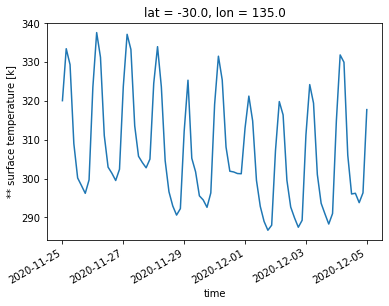

In [21]:
# A single grid-cell for all time steps/\.
d1.tmpsfc.sel(lat = -30, lon = 135).plot()

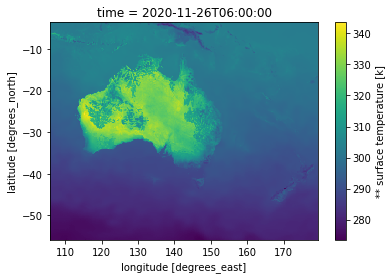

In [22]:
# Specifying only timestep.
d1.tmpsfc.isel(time = 10).plot()

(array([1.260000e+02, 3.696370e+05, 1.344402e+06, 1.140501e+06,
        1.773674e+06, 1.534330e+05, 1.078560e+05, 7.125300e+04,
        1.589800e+04, 3.460000e+02]),
 array([261.32922, 270.53723, 279.7452 , 288.9532 , 298.1612 , 307.3692 ,
        316.57718, 325.78516, 334.99316, 344.20117, 353.40915],
       dtype=float32),
 <a list of 10 Patch objects>)

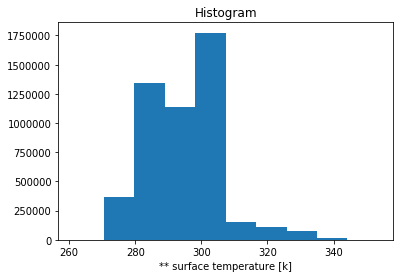

In [23]:
# Specifying all value will create a pdf of data.
d1.tmpsfc.plot()

<h1> Where Statement <h1>

<b> Where </b> is used to find the locations of conditions

In [24]:
d1.tmpsfc > 20

<xarray.DataArray 'tmpsfc' (time: 81, lat: 209, lon: 294)>
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       ...,

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2

In [25]:
# e.g finding all the locations where temperature is greater than 20 degrees (293 K).
d1.tmpsfc > (20 + 273) # + 273 as tmperature units are in kelvin

<xarray.DataArray 'tmpsfc' (time: 81, lat: 209, lon: 294)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       ...,

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2

In [26]:
# Applyting the conditional statements will now replace all the values below 20 with nan values.
d1.tmpsfc.where(d1.tmpsfc > 293)

<xarray.DataArray 'tmpsfc' (time: 81, lat: 209, lon: 294)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.43408, 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
         302.0341 ],
        [301.7341 , 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
         302.0341 ],
        [302.6341 , 302.5341 , 302.43408, ..., 302.0341 , 301.93408,
         301.93408]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.49997, 302.4    , 302.4    , ..., 302.19998, 302.19998,
         302.09998],
        [302.19998, 302.4    , 302.4    , ..., 302.19998, 302.09998,
         302.09998],
        [302.59998, 302.4    , 302.4    , ..., 302.09998, 301.99997,
         301.99997]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.9102 , 302.5102 , 302.5102 , ..., 302.0102 , 301.9102 ,
         301.9102 ],
        [303.0102 , 302.71017, 302.6102 , ..., 302.0102 , 301.9102 ,
         301.9102 ],
        [303.1102 , 302.9102 , 302.5102 , ..., 301.9102 , 301.9102 ,
         301.81018]],

       ...,

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.19946, 302.19946, 302.19946, ..., 301.99948, 301.99948,
         301.99948],
        [301.49948, 302.19946, 302.19946, ..., 301.99948, 301.89948,
         301.89948],
        [302.39948, 302.29947, 302.19946, ..., 301.99948, 301.89948,
         301.89948]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.2242 , 302.2242 , 302.2242 , ..., 302.1242 , 302.0242 ,
         302.0242 ],
        [301.3242 , 302.2242 , 302.2242 , ..., 302.0242 , 302.0242 ,
         301.9242 ],
        [302.3242 , 302.2242 , 302.2242 , ..., 302.0242 , 301.9242 ,
         301.9242 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.23526, 302.23526, 302.23526, ..., 302.23526, 302.23526,
         302.13525],
        [301.53525, 302.23526, 302.23526, ..., 302.23526, 302.13525,
         302.13525],
        [302.33527, 302.23526, 302.23526, ..., 302.13525, 302.03525,
         302.03525]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Attributes:
    long_name:  ** surface temperature [k]

In [27]:
# By adding a second arguement to the where statement, all the values instead
# of being replaced with nan will now be replaced with that values (99999 in this exmple).
d1.tmpsfc.where(d1.tmpsfc > 293, 99999)

<xarray.DataArray 'tmpsfc' (time: 81, lat: 209, lon: 294)>
array([[[99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        ...,
        [  302.43408203,   302.43408203,   302.43408203, ...,
           302.13409424,   302.03408813,   302.03408813],
        [  301.73410034,   302.43408203,   302.43408203, ...,
           302.13409424,   302.03408813,   302.03408813],
        [  302.63409424,   302.53408813,   302.43408203, ...,
           302.03408813,   301.93408203,   301.93408203]],

       [[99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        ...,
        [  302.49996948,   302.3999939 ,   302.3999939 , ...,
           302.19998169,   302.19998169,   302.09997559],
        [  302.19998169,   302.3999939 ,   302.3999939 , ...,
           302.19998169,   302.09997559,   302.09997559],
        [  302.59997559,   302.3999939 ,   302.3999939 , ...,
           302.09997559,   301.99996948,   301.99996948]],

       [[99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        ...,
        [  302.91018677,   302.51019287,   302.51019287, ...,
           302.01019287,   301.91018677,   301.91018677],
        [  303.01019287,   302.71017456,   302.61019897, ...,
           302.01019287,   301.91018677,   301.91018677],
        [  303.11019897,   302.91018677,   302.51019287, ...,
           301.91018677,   301.91018677,   301.81018066]],

       ...,

       [[99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        ...,
        [  302.19946289,   302.19946289,   302.19946289, ...,
           301.9994812 ,   301.9994812 ,   301.9994812 ],
        [  301.4994812 ,   302.19946289,   302.19946289, ...,
           301.9994812 ,   301.8994751 ,   301.8994751 ],
        [  302.3994751 ,   302.29946899,   302.19946289, ...,
           301.9994812 ,   301.8994751 ,   301.8994751 ]],

       [[99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        ...,
        [  302.22421265,   302.22421265,   302.22421265, ...,
           302.12420654,   302.02420044,   302.02420044],
        [  301.32418823,   302.22421265,   302.22421265, ...,
           302.02420044,   302.02420044,   301.92419434],
        [  302.32418823,   302.22421265,   302.22421265, ...,
           302.02420044,   301.92419434,   301.92419434]],

       [[99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [99999.        , 99999.        , 99999.        , ...,
         99999.        , 99999.        , 99999.        ],
        [9999

This can also be done with replacing the value from the array in question with the value from another array. For example, if I wanted I could replace all the d1 values greater than 293 kelvin with the values from d3. This example does not make much sense, but is demonstrative of the principle.

In [28]:
xr.where(d1.tmpsfc > 293, d1.tmpsfc.values, d3.tmin2m.values)

<xarray.DataArray 'tmpsfc' (time: 81, lat: 209, lon: 294)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.43408, 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
         302.0341 ],
        [301.7341 , 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
         302.0341 ],
        [302.6341 , 302.5341 , 302.43408, ..., 302.0341 , 301.93408,
         301.93408]],

       [[271.9298 , 271.9498 , 271.9598 , ..., 280.1698 , 280.2098 ,
         280.2498 ],
        [272.0198 , 272.0698 , 272.0998 , ..., 280.3798 , 280.4498 ,
         280.4998 ],
        [272.2098 , 272.0998 , 272.0798 , ..., 280.5798 , 280.6098 ,
         280.6398 ],
        ...,
        [302.49997, 302.4    , 302.4    , ..., 302.19998, 302.19998,
         302.09998],
        [302.19998, 302.4    , 302.4    , ..., 302.19998, 302.09998,
         302.09998],
        [302.59998, 302.4    , 302.4    , ..., 302.09998, 301.99997,
         301.99997]],

       [[271.9272 , 271.94717, 271.9372 , ..., 280.16718, 280.20718,
         280.2472 ],
        [272.0272 , 272.06717, 272.10718, ..., 280.38718, 280.44717,
         280.4972 ],
        [272.20718, 272.09717, 272.07718, ..., 280.5572 , 280.60718,
         280.6472 ],
        ...,
        [302.9102 , 302.5102 , 302.5102 , ..., 302.0102 , 301.9102 ,
         301.9102 ],
        [303.0102 , 302.71017, 302.6102 , ..., 302.0102 , 301.9102 ,
         301.9102 ],
        [303.1102 , 302.9102 , 302.5102 , ..., 301.9102 , 301.9102 ,
         301.81018]],

       ...,

       [[273.7557 , 273.7657 , 273.7657 , ..., 277.1557 , 277.1957 ,
         277.1957 ],
        [273.8057 , 273.8457 , 273.8457 , ..., 277.2957 , 277.3157 ,
         277.32568],
        [273.8057 , 273.8457 , 273.8957 , ..., 277.3857 , 277.3757 ,
         277.3757 ],
        ...,
        [302.19946, 302.19946, 302.19946, ..., 301.99948, 301.99948,
         301.99948],
        [301.49948, 302.19946, 302.19946, ..., 301.99948, 301.89948,
         301.89948],
        [302.39948, 302.29947, 302.19946, ..., 301.99948, 301.89948,
         301.89948]],

       [[273.82196, 273.80194, 273.79196, ..., 277.48193, 277.34195,
         277.25195],
        [273.97195, 273.91196, 273.90195, ..., 277.66196, 277.56195,
         277.53195],
        [274.13196, 274.04196, 274.00195, ..., 277.82196, 277.76193,
         277.77194],
        ...,
        [302.2242 , 302.2242 , 302.2242 , ..., 302.1242 , 302.0242 ,
         302.0242 ],
        [301.3242 , 302.2242 , 302.2242 , ..., 302.0242 , 302.0242 ,
         301.9242 ],
        [302.3242 , 302.2242 , 302.2242 , ..., 302.0242 , 301.9242 ,
         301.9242 ]],

       [[273.82196, 273.80194, 273.79196, ..., 277.48193, 277.34195,
         277.25195],
        [273.97195, 273.91196, 273.90195, ..., 277.66196, 277.56195,
         277.53195],
        [274.13196, 274.04196, 274.00195, ..., 277.82196, 277.76193,
         277.77194],
        ...,
        [302.23526, 302.23526, 302.23526, ..., 302.23526, 302.23526,
         302.13525],
        [301.53525, 302.23526, 302.23526, ..., 302.23526, 302.13525,
         302.13525],
        [302.33527, 302.23526, 302.23526, ..., 302.13525, 302.03525,
         302.03525]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2

<b> drop = True </b>

This keyword will remove the coordinates where the where condition is not met.

In [29]:
# In the above exmpale this will not work, as there will be values for each time/lat/lon that still have 
# non-nan values and will thus, not be removed.

In [30]:
d1.tmpsfc.where(d1.tmpsfc > 293, drop = True)

<xarray.DataArray 'tmpsfc' (time: 81, lat: 173, lon: 294)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.43408, 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
         302.0341 ],
        [301.7341 , 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
         302.0341 ],
        [302.6341 , 302.5341 , 302.43408, ..., 302.0341 , 301.93408,
         301.93408]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.49997, 302.4    , 302.4    , ..., 302.19998, 302.19998,
         302.09998],
        [302.19998, 302.4    , 302.4    , ..., 302.19998, 302.09998,
         302.09998],
        [302.59998, 302.4    , 302.4    , ..., 302.09998, 301.99997,
         301.99997]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.9102 , 302.5102 , 302.5102 , ..., 302.0102 , 301.9102 ,
         301.9102 ],
        [303.0102 , 302.71017, 302.6102 , ..., 302.0102 , 301.9102 ,
         301.9102 ],
        [303.1102 , 302.9102 , 302.5102 , ..., 301.9102 , 301.9102 ,
         301.81018]],

       ...,

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.19946, 302.19946, 302.19946, ..., 301.99948, 301.99948,
         301.99948],
        [301.49948, 302.19946, 302.19946, ..., 301.99948, 301.89948,
         301.89948],
        [302.39948, 302.29947, 302.19946, ..., 301.99948, 301.89948,
         301.89948]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.2242 , 302.2242 , 302.2242 , ..., 302.1242 , 302.0242 ,
         302.0242 ],
        [301.3242 , 302.2242 , 302.2242 , ..., 302.0242 , 302.0242 ,
         301.9242 ],
        [302.3242 , 302.2242 , 302.2242 , ..., 302.0242 , 301.9242 ,
         301.9242 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [302.23526, 302.23526, 302.23526, ..., 302.23526, 302.23526,
         302.13525],
        [301.53525, 302.23526, 302.23526, ..., 302.23526, 302.13525,
         302.13525],
        [302.33527, 302.23526, 302.23526, ..., 302.13525, 302.03525,
         302.03525]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -46.75 -46.5 -46.25 -46.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Attributes:
    long_name:  ** surface temperature [k]

However, when looking at say a single timeseries, this will remove time values

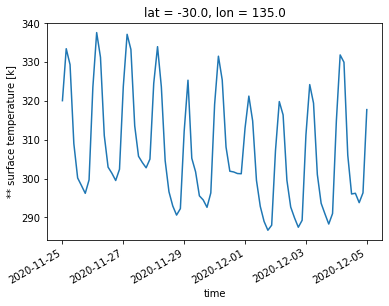

In [31]:
d1.tmpsfc.sel(lat = -30, lon = 135).plot()

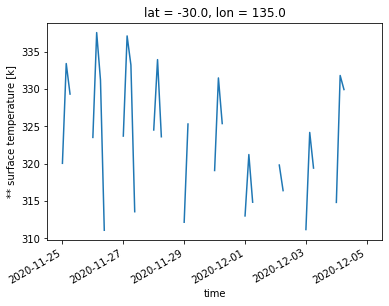

In [32]:
# No drop statment (time values are still there will nans in place).
d1.tmpsfc.sel(lat = -30, lon = 135).where(d1.tmpsfc.sel(lat = -30, lon = 135) > 310).plot()

The above statement was getting quite long for a single line. This could be made more manageable.

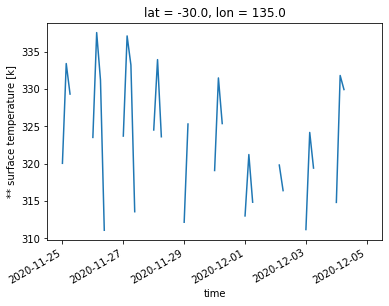

In [33]:
single_cell = d1.tmpsfc.sel(lat = -30, lon = 135)
single_cell.where(single_cell > 310).plot()

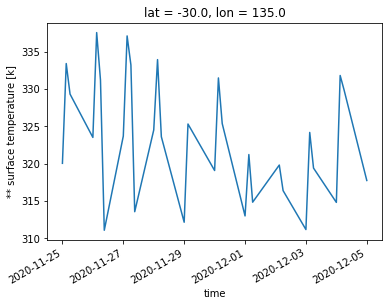

In [34]:
# Drop now included.
single_cell = d1.tmpsfc.sel(lat = -30, lon = 135)
single_cell.where(single_cell > 310, drop = True).plot()

However, this also works differently if there are two different conditions. np.logical_and or np.logical_or must be used with arguments separated by commas.

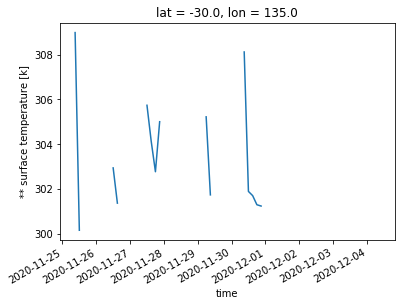

In [35]:
single_cell.where(np.logical_and(single_cell > 300, single_cell < 310)).plot()

<h1> Simple Maths </h1>

Xarray has many built in commands that can be used on xarray datasets.

In [36]:
d1

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 274.43408 274.43408 ... 302.03525

In [37]:
# Summing all values across the dataset.
d1.sum()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tmpsfc   float32 1466821600.0

In [38]:
d1.count()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tmpsfc   int32 4977126

In [39]:
d1.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tmpsfc   float32 294.7126

In [40]:
d1.std()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tmpsfc   float64 13.82

In [41]:
d1.max()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tmpsfc   float64 353.4

In [42]:
d1.min()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tmpsfc   float64 261.3

Percentiles

In [43]:
d1.reduce(np.nanpercentile, q = 90)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tmpsfc   float64 304.2

These can then also be applied across specific dimensions.

In [44]:
d1.sum(dim = 'time')

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294)
Coordinates:
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (lat, lon) float32 22252.88 22252.285 ... 24454.893 24452.664

In [45]:
d1.sum(dim = 'lat')

<xarray.Dataset>
Dimensions:  (lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lon) float32 60781.145 60779.145 ... 61459.06 61462.453

In [46]:
d1.mean(dim = 'time')

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294)
Coordinates:
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (lat, lon) float32 274.72693 274.71957 ... 301.91226 301.88474

In [47]:
d1.reduce(np.nanpercentile, q = 90, dim = 'time')

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294)
Coordinates:
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (lat, lon) float64 274.9 274.9 274.9 274.8 ... 302.1 302.0 302.0

# Merging/Combining

Merging two data sets that have the same coodinates.

In [48]:
xr.merge([d1, d3])

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 274.43408 274.43408 ... 302.03525
    tmin2m   (time, lat, lon) float32 nan nan nan ... 300.92194 300.86194

Adding a numpy array to an xarray file

In [49]:
d4['new_item'] = (('time','lat','lon'), d4.tmax2m.values ** 2)
d4

<xarray.Dataset>
Dimensions:   (lat: 209, lon: 294, time: 35)
Coordinates:
  * time      (time) datetime64[ns] 2020-11-25 ... 2020-11-29T06:00:00
  * lat       (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon       (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmax2m    (time, lat, lon) float32 nan nan nan ... 301.81326 301.82324
    new_item  (time, lat, lon) float32 nan nan nan ... 91091.24 91097.266

<b> Combining into the one coordinate (xr.concat) <b/>

For example, say I had variables in different xarray files that where all different elevation levels of the same variable. I don't want a coordinate for each level, it would be much better to have the one coordinate called level and then a number (float) for each level. The data I'm using isn't different levels, but for the purpose of this example I will pretened it is.

In [50]:
xr.concat([d1.tmpsfc, d3.tmin2m, d4.tmax2m], pd.Index([0,10,20], name = 'height'))

<xarray.DataArray 'tmpsfc' (height: 3, time: 81, lat: 209, lon: 294)>
array([[[[274.43408, 274.43408, 274.43408, ..., 279.7341 , 279.83408,
          279.83408],
         [274.5341 , 274.5341 , 274.5341 , ..., 279.93408, 279.93408,
          279.93408],
         [274.6341 , 274.6341 , 274.7341 , ..., 279.93408, 280.0341 ,
          280.1341 ],
         ...,
         [302.43408, 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
          302.0341 ],
         [301.7341 , 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
          302.0341 ],
         [302.6341 , 302.5341 , 302.43408, ..., 302.0341 , 301.93408,
          301.93408]],

        [[274.49997, 274.49997, 274.49997, ..., 279.9    , 279.99997,
          279.99997],
         [274.59998, 274.49997, 274.59998, ..., 279.99997, 280.09998,
          280.09998],
         [274.59998, 274.59998, 274.69998, ..., 279.8    , 279.9    ,
          279.99997],
         ...,
         [302.49997, 302.4    , 302.4    , ..., 302.19998, 302.19998,
          302.09998],
         [302.19998, 302.4    , 302.4    , ..., 302.19998, 302.09998,
          302.09998],
         [302.59998, 302.4    , 302.4    , ..., 302.09998, 301.99997,
          301.99997]],

        [[274.5102 , 274.5102 , 274.5102 , ..., 279.6102 , 279.71017,
          279.71017],
         [274.6102 , 274.5102 , 274.6102 , ..., 279.71017, 279.9102 ,
          279.9102 ],
         [274.6102 , 274.6102 , 274.71017, ..., 279.81018, 279.9102 ,
          280.0102 ],
         ...,
         [302.9102 , 302.5102 , 302.5102 , ..., 302.0102 , 301.9102 ,
          301.9102 ],
         [303.0102 , 302.71017, 302.6102 , ..., 302.0102 , 301.9102 ,
          301.9102 ],
         [303.1102 , 302.9102 , 302.5102 , ..., 301.9102 , 301.9102 ,
          301.81018]],

        ...,

        [[274.79947, 274.79947, 274.79947, ..., 279.69946, 279.79947,
          279.79947],
         [274.79947, 274.79947, 274.89948, ..., 279.79947, 279.99948,
          279.99948],
         [274.89948, 274.89948, 274.89948, ..., 279.89948, 279.99948,
          280.09946],
         ...,
         [302.19946, 302.19946, 302.19946, ..., 301.99948, 301.99948,
          301.99948],
         [301.49948, 302.19946, 302.19946, ..., 301.99948, 301.89948,
          301.89948],
         [302.39948, 302.29947, 302.19946, ..., 301.99948, 301.89948,
          301.89948]],

        [[274.7242 , 274.7242 , 274.7242 , ..., 279.7242 , 279.7242 ,
          279.8242 ],
         [274.9242 , 274.8242 , 274.9242 , ..., 279.8242 , 279.9242 ,
          279.9242 ],
         [275.0242 , 274.9242 , 274.9242 , ..., 279.9242 , 280.0242 ,
          280.0242 ],
         ...,
         [302.2242 , 302.2242 , 302.2242 , ..., 302.1242 , 302.0242 ,
          302.0242 ],
         [301.3242 , 302.2242 , 302.2242 , ..., 302.0242 , 302.0242 ,
          301.9242 ],
         [302.3242 , 302.2242 , 302.2242 , ..., 302.0242 , 301.9242 ,
          301.9242 ]],

        [[274.93527, 274.93527, 274.83527, ..., 279.73526, 279.83527,
          279.83527],
         [274.93527, 274.93527, 274.93527, ..., 279.93527, 280.03525,
          280.03525],
         [275.03525, 275.03525, 275.13525, ..., 280.13525, 280.13525,
          280.13525],
         ...,
         [302.23526, 302.23526, 302.23526, ..., 302.23526, 302.23526,
          302.13525],
         [301.53525, 302.23526, 302.23526, ..., 302.23526, 302.13525,
          302.13525],
         [302.33527, 302.23526, 302.23526, ..., 302.13525, 302.03525,
          302.03525]]],


       [[[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         ...,
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan, 

Note: even though these arrays are off different shape, xarray was still able to concatenate them together.

# Resampling

This is can be done in two ways: <b> groupby() </b> or <b> resample <b>.

In [51]:
d1

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 274.43408 274.43408 ... 302.03525

In [52]:
# The average temperature each day.
d1.groupby('time.day').mean(dim = 'time')

<xarray.Dataset>
Dimensions:  (day: 11, lat: 209, lon: 294)
Coordinates:
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
  * day      (day) int64 1 2 3 4 5 25 26 27 28 29 30
Data variables:
    tmpsfc   (day, lat, lon) float32 274.96368 274.96365 ... 301.91666 301.90417

In [53]:
# Also the everage temperature each day.
d1.resample(time = 'D').mean()

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 11)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-26 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 274.47934 274.47934 ... 302.03525

With this data it is hard to show the difference between the two approaches. However, with a longer dataset the differences would become more apparent. 
<br>
* groupby('time.day').mean(dim = 'time') when applied to multiple years would group all the same days together (e.g 01-02-2008, 01-02-2009, 01-02-2020...) and take the mean this way.
* resample(time = 'D').mean() finds the mean for each separate day.

# Applying Function to All Cells Individually

This can be done by creating a function then vectorising the function.

In [54]:
def hot_or_not(temp):
    if temp < (25 + 273):
        return 'not hot'
    if temp < (30 + 273):
        return 'a smidgen hot'
    return 'hot hot hot hot hot'

In [55]:
hot_or_not_vec = np.vectorize(hot_or_not)

In [56]:
hot_or_not_vec(d1.tmpsfc)

array([[['not hot', 'not hot', 'not hot', ..., 'not hot', 'not hot',
         'not hot'],
        ['not hot', 'not hot', 'not hot', ..., 'not hot', 'not hot',
         'not hot'],
        ['not hot', 'not hot', 'not hot', ..., 'not hot', 'not hot',
         'not hot'],
        ...,
        ['a smidgen hot', 'a smidgen hot', 'a smidgen hot', ...,
         'a smidgen hot', 'a smidgen hot', 'a smidgen hot'],
        ['a smidgen hot', 'a smidgen hot', 'a smidgen hot', ...,
         'a smidgen hot', 'a smidgen hot', 'a smidgen hot'],
        ['a smidgen hot', 'a smidgen hot', 'a smidgen hot', ...,
         'a smidgen hot', 'a smidgen hot', 'a smidgen hot']],

       [['not hot', 'not hot', 'not hot', ..., 'not hot', 'not hot',
         'not hot'],
        ['not hot', 'not hot', 'not hot', ..., 'not hot', 'not hot',
         'not hot'],
        ['not hot', 'not hot', 'not hot', ..., 'not hot', 'not hot',
         'not hot'],
        ...,
        ['a smidgen hot', 'a smidgen hot', 'a smidgen 

# Applying Function Along Axis (e.g. trends and spearman correlation)

## Linear Trends

This is done using the np.apply_along axis. This requires a few more steps than the other methods that have been used previously. 
https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html

np.apply_along_axis takes several arguments. These arguments, in order are:
* a function that will be applied along an axis (e.g the linear trends)
* the number of the axis that it will be applied along
* the data that you will be applying it to
* an extra info (e.g. if we are using it for linear trends then this is where the time values might go into the function)

The example below will be for calculating the trend of our data set. As are data set is just random temperature values then we will not be expecting any trend.

In [57]:
d1

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 274.43408 274.43408 ... 302.03525

In [58]:
# This is the function that will be fed into our np.apply_along_axis. This function has seveal additions that
# wil help it run more smoothly. 
def grid_trend(temp,time):
    # The first part is looking at if the whole dimension is nan values. This is useful
    # if you have ocean points in your data set which will have nan values for every point.
    # If this is not applied it will break.
    if np.all(np.isnan(temp)):
        return float('nan')
    
    # There may also be a few nan values here and there. We also want to remove them by 
    # looking at when both the temp and time points are finite (e.g. not nan).
    idx = np.isfinite(temp) & np.isfinite(time)
    temp = temp[idx]
    time = time[idx]
    # Now appplying the polyfit and just returning the gradient of the line using [0]
    grad = np.polyfit(time, temp,1)[0] 
    
    return grad

In [59]:
d1

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 274.43408 274.43408 ... 302.03525

In [60]:
# Getting the axis number. 
axis_num = d1.tmpsfc.get_axis_num('time')
axis_num

0

As you can see the axis number of time is 0. Looking at the d1 data set in the data variables section we can see than we have tmpsfc (time, lat, lon). time is the 0 axis as it is in the 0 position for this data set. lat will be one and lon will be 2. 

* note: in the function below because we have time stamps we can not use this in the linear regression. If we had just a float values we could do this, but we have timestamps. Instead then we will just put some filler x values. All that really matters is that they are spaces 1 unit appart.

In [61]:
time = np.arange(len(d1.time.values))
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [62]:
'''Applying trends along each grid cell'''
trend_meta = np.apply_along_axis(grid_trend, # The function to be applied 
                                axis_num, # The axis number (could have just put 0 here, but automation)
                                arr = d1.tmpsfc.values, # the d1 values
                                time = time) # The filler equally space
trend_meta

array([[ 4.39747618e-03,  4.44948288e-03,  4.27549615e-03, ...,
         1.06069604e-03,  1.10596723e-03,  1.45259261e-03],
       [ 4.10831868e-03,  4.44148338e-03,  4.26302999e-03, ...,
         9.24156761e-04,  1.37012003e-03,  1.60727083e-03],
       [ 4.06991120e-03,  4.28336815e-03,  4.33083580e-03, ...,
         1.40511531e-03,  1.38140354e-03,  1.40731729e-03],
       ...,
       [-2.63389718e-03, -1.98575152e-03, -1.94959494e-03, ...,
        -4.43370512e-04, -4.71567569e-04, -2.53623266e-04],
       [-1.56808662e-03, -3.25155284e-03, -2.26806255e-03, ...,
        -6.61288626e-04, -1.54259879e-04, -6.95239776e-05],
       [-3.57113970e-03, -3.94148099e-03, -2.94219295e-03, ...,
        -1.37344264e-04, -1.45171458e-04,  8.62838345e-05]])

In [63]:
trend_meta.shape

(209, 294)

In [64]:

# np.apply_along_axis is a numpy method and not an xarray method, and thus will return a 
# numpy array and not an xarray d1 set. Thus we must read back into xarray. 
'''Turning into an xarray d1set'''
trend  = xr.Dataset(
    {'trend':(('lat','lon'), trend_meta)},

    {
     'lat':d1.lat,
    'lon':d1.lon}
)

trend

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294)
Coordinates:
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    trend    (lat, lon) float64 0.004397 0.004449 ... -0.0001452 8.628e-05

Thus we not have our trend data set :)

## Spearman Correlation.

In [65]:
from scipy.stats import spearmanr

This gets a little trickier with the spearman correlation

In [66]:
d1

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmpsfc   (time, lat, lon) float32 274.43408 274.43408 ... 302.03525

In [67]:
d3

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294, time: 81)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    tmin2m   (time, lat, lon) float32 nan nan nan ... 300.92194 300.86194

Say we wanted to see how the surface temperature (tmpsfc) and the min 2m temperature (tmin2m) correlated but with the non-parametric spearman correlation. This gets a little harder as the np.apply_along_axis can only take one array that we specify the axis number. We could always do this with for loops, but that is not in the true spirit of python (sometime needed though). So what we will instead do is merge the two data sets together and then split down the middle in the function (I know, weird).

In [68]:
# This is the function we will be using in our np.apply_along_axis function now. 

def helper(x, len_a):
    # split x into 'a' and 'b' parts
    
    # Splitting into the two parts. This could also just be split in half
    # as  for correlation to work you need equal data sets anyway. But hey, show casing some other stuff
    # by doing it this way.
    xa = x[0:len_a]
    xb = x[len_a:]
    

    corr,sig = spearmanr(xa,xb, nan_policy = 'omit')
    
    return corr, sig

In [69]:
# THis is concating the two different datasets into the one xarry file. They will be split down the middle
# later on.
len_a = len(d1.tmpsfc['time'])
len_a

81

In [70]:
# Joining the two dataset together. The time will now have twice as many points
index_concat = xr.concat([d1.tmpsfc,d3.tmin2m], dim = 'time')
index_concat

<xarray.DataArray 'tmpsfc' (time: 162, lat: 209, lon: 294)>
array([[[274.43408, 274.43408, 274.43408, ..., 279.7341 , 279.83408,
         279.83408],
        [274.5341 , 274.5341 , 274.5341 , ..., 279.93408, 279.93408,
         279.93408],
        [274.6341 , 274.6341 , 274.7341 , ..., 279.93408, 280.0341 ,
         280.1341 ],
        ...,
        [302.43408, 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
         302.0341 ],
        [301.7341 , 302.43408, 302.43408, ..., 302.1341 , 302.0341 ,
         302.0341 ],
        [302.6341 , 302.5341 , 302.43408, ..., 302.0341 , 301.93408,
         301.93408]],

       [[274.49997, 274.49997, 274.49997, ..., 279.9    , 279.99997,
         279.99997],
        [274.59998, 274.49997, 274.59998, ..., 279.99997, 280.09998,
         280.09998],
        [274.59998, 274.59998, 274.69998, ..., 279.8    , 279.9    ,
         279.99997],
        ...,
        [302.49997, 302.4    , 302.4    , ..., 302.19998, 302.19998,
         302.09998],
        [302.19998, 302.4    , 302.4    , ..., 302.19998, 302.09998,
         302.09998],
        [302.59998, 302.4    , 302.4    , ..., 302.09998, 301.99997,
         301.99997]],

       [[274.5102 , 274.5102 , 274.5102 , ..., 279.6102 , 279.71017,
         279.71017],
        [274.6102 , 274.5102 , 274.6102 , ..., 279.71017, 279.9102 ,
         279.9102 ],
        [274.6102 , 274.6102 , 274.71017, ..., 279.81018, 279.9102 ,
         280.0102 ],
        ...,
        [302.9102 , 302.5102 , 302.5102 , ..., 302.0102 , 301.9102 ,
         301.9102 ],
        [303.0102 , 302.71017, 302.6102 , ..., 302.0102 , 301.9102 ,
         301.9102 ],
        [303.1102 , 302.9102 , 302.5102 , ..., 301.9102 , 301.9102 ,
         301.81018]],

       ...,

       [[273.7557 , 273.7657 , 273.7657 , ..., 277.1557 , 277.1957 ,
         277.1957 ],
        [273.8057 , 273.8457 , 273.8457 , ..., 277.2957 , 277.3157 ,
         277.32568],
        [273.8057 , 273.8457 , 273.8957 , ..., 277.3857 , 277.3757 ,
         277.3757 ],
        ...,
        [300.7657 , 301.5957 , 301.9157 , ..., 300.9457 , 300.8757 ,
         300.88568],
        [300.38568, 301.4357 , 301.9357 , ..., 301.0357 , 300.9657 ,
         300.9257 ],
        [300.2557 , 301.3357 , 301.7957 , ..., 301.0257 , 300.9957 ,
         300.9357 ]],

       [[273.82196, 273.80194, 273.79196, ..., 277.48193, 277.34195,
         277.25195],
        [273.97195, 273.91196, 273.90195, ..., 277.66196, 277.56195,
         277.53195],
        [274.13196, 274.04196, 274.00195, ..., 277.82196, 277.76193,
         277.77194],
        ...,
        [300.68195, 301.25195, 301.33194, ..., 301.01193, 301.03195,
         300.98193],
        [300.04196, 301.27194, 301.64194, ..., 301.04193, 300.96194,
         300.91196],
        [299.73193, 301.15195, 301.60196, ..., 300.99194, 300.92194,
         300.86194]],

       [[273.82196, 273.80194, 273.79196, ..., 277.48193, 277.34195,
         277.25195],
        [273.97195, 273.91196, 273.90195, ..., 277.66196, 277.56195,
         277.53195],
        [274.13196, 274.04196, 274.00195, ..., 277.82196, 277.76193,
         277.77194],
        ...,
        [300.66196, 301.22195, 301.21194, ..., 301.01193, 301.03195,
         300.98193],
        [299.97195, 301.22195, 301.34195, ..., 301.01193, 300.96194,
         300.91196],
        [299.49194, 301.09195, 301.39194, ..., 300.99194, 300.92194,
         300.86194]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
  * time     (time) datetime64[ns] 2020-11-25 2020-11-25T03:00:00 ... 2020-12-05
Attributes:
    long_name:  ** surface temperature [k]

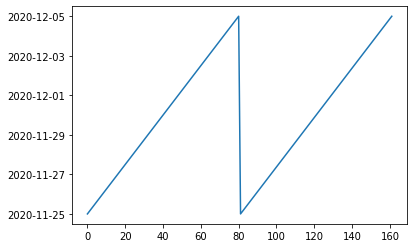

In [71]:
# Time now repeats itself as well now.
plt.plot(index_concat.time.values)

In [72]:
# The axis number 
axis_num =  index_concat.get_axis_num('time')
axis_num

0

In [73]:
# The data or arguement.
arr = index_concat.values

In [74]:
spearman_index_meta, sig_meta = np.apply_along_axis(helper, arr = arr, 
                                     axis = axis_num, len_a = len_a)

In [75]:
# Here we have it, a whole array of the correlation values.
spearman_index_meta

array([[ 0.60445868,  0.64154355,  0.58945077, ...,  0.02792223,
         0.13843345,  0.09916167],
       [ 0.61944544,  0.62000055,  0.57372687, ..., -0.01610453,
         0.02629883,  0.00180119],
       [ 0.59930099,  0.59545842,  0.59957314, ..., -0.00078639,
         0.10321055,  0.06037799],
       ...,
       [ 0.06740677, -0.00499472, -0.0543022 , ...,  0.25554739,
         0.31193446,  0.34830597],
       [ 0.11270025, -0.02991779, -0.09022319, ...,  0.39684791,
         0.25448096,  0.26081756],
       [ 0.00260818, -0.14941552, -0.08143393, ...,  0.2540629 ,
         0.11701855,  0.24321944]])

In [76]:
spearman_index = xr.Dataset({'correlation':(('lat','lon'), spearman_index_meta)},{
    'lat':d1.tmpsfc.lat.values,
    'lon':d1.tmpsfc.lon.values
})


spearman_sig = xr.Dataset({'p_value':(('lat','lon'), sig_meta)},{
    'lat' : d1.tmpsfc.lat.values,
    'lon': d1.tmpsfc.lon.values
})

In [77]:
spearman_index

<xarray.Dataset>
Dimensions:      (lat: 209, lon: 294)
Coordinates:
  * lat          (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.25 -4.0 -3.75
  * lon          (lon) float64 106.0 106.2 106.5 106.8 ... 178.8 179.0 179.2
Data variables:
    correlation  (lat, lon) float64 0.6045 0.6415 0.5895 ... 0.2541 0.117 0.2432

In [78]:
spearman_sig

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294)
Coordinates:
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    p_value  (lat, lon) float64 2.9e-09 1.438e-10 8.796e-09 ... 0.3013 0.02971

In [79]:
# Getting only the significant points
spearman_sig = spearman_sig.where(spearman_sig.p_value < 0.1)
spearman_sig

<xarray.Dataset>
Dimensions:  (lat: 209, lon: 294)
Coordinates:
  * lat      (lat) float64 -55.75 -55.5 -55.25 -55.0 ... -4.5 -4.25 -4.0 -3.75
  * lon      (lon) float64 106.0 106.2 106.5 106.8 ... 178.5 178.8 179.0 179.2
Data variables:
    p_value  (lat, lon) float64 2.9e-09 1.438e-10 8.796e-09 ... nan 0.02971

<h1> Saving data </h1>

In [80]:
d1.to_netcdf('d5.nc')

Xarray also has the ability to save netcdf files with compressions. I have not fully used this feature, as such the explanation will be rather spase.

In [81]:
encoding = d1.encoding.update({
    'zlib': True
    'complevel':4 # The higher the number the greater than amount of compression. 
})

SyntaxError: invalid syntax (<ipython-input-81-2db25b92cf50>, line 3)

In [ ]:
d1.to_netcdf('d1_compressed.nc', encoding = encoding)

Bash can also be used in jupyter notebook

In [ ]:
!ls